<a href="https://colab.research.google.com/github/Priyansh4615/Learning-/blob/main/stock_market_analysis_with_supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM**

In [2]:
# Data collection
import pandas_datareader as pdr

In [5]:
df = pdr.get_data_tiingo('AAPL' , api_key = '0eae58d56c4ba11e7e57f50122d6216576f05a1a')

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df1 = pd.read_csv('AAPL.csv')

In [11]:
df1.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-18 00:00:00+00:00,176.42,177.20,174.86,174.88,28831533,41.937498,42.122915,41.566664,41.571419,115326132,0.0,1.0
1,AAPL,2017-12-19 00:00:00+00:00,174.54,175.39,174.09,175.03,27078872,41.490596,41.692653,41.383624,41.607076,108315488,0.0,1.0
2,AAPL,2017-12-20 00:00:00+00:00,174.35,175.42,173.25,174.87,23000392,41.445430,41.699784,41.183945,41.569041,92001568,0.0,1.0
3,AAPL,2017-12-21 00:00:00+00:00,175.01,176.02,174.10,174.17,20356826,41.602321,41.842412,41.386002,41.402642,81427304,0.0,1.0
4,AAPL,2017-12-22 00:00:00+00:00,175.01,175.42,174.50,174.68,16052615,41.602321,41.699784,41.481087,41.523876,64210460,0.0,1.0


In [15]:
df1.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-12-08 00:00:00+00:00,142.65,143.5200,141.10,142.36,62128338,142.65,143.5200,141.10,142.36,62128338,0.0,1.0
1253,AAPL,2022-12-09 00:00:00+00:00,142.16,145.5700,140.90,142.34,76097011,142.16,145.5700,140.90,142.34,76097011,0.0,1.0
1254,AAPL,2022-12-12 00:00:00+00:00,144.49,144.5000,141.06,142.70,70462654,144.49,144.5000,141.06,142.70,70462654,0.0,1.0
1255,AAPL,2022-12-13 00:00:00+00:00,145.47,149.9692,144.24,149.50,93886161,145.47,149.9692,144.24,149.50,93886161,0.0,1.0
1256,AAPL,2022-12-14 00:00:00+00:00,143.21,146.6550,141.16,145.35,82291182,143.21,146.6550,141.16,145.35,82291182,0.0,1.0


In [12]:
df2 = df.reset_index()['close']

In [14]:
df2.shape

(1257,)

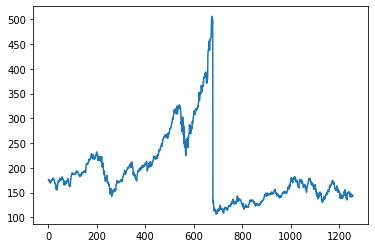

In [16]:
import matplotlib.pyplot as plt
plt.plot(df2)

**LSTM are so sensitive to the scale of the data . so we apply MinMax Scaler**

In [17]:
import numpy as np

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [23]:
print(df2)

[[0.17427677]
 [0.16956794]
 [0.16909205]
 ...
 [0.09430182]
 [0.09675642]
 [0.0910958 ]]


**Splitting dataset into train and test data**

In [24]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df2[0:training_size,:], df2[training_size:len(df2),:1]

In [26]:
#convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], [];
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i +  time_step, 0 ])
  return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t , t+1 , t+3 and Y = t+4
time_step = 100
X_train , y_train = create_dataset(train_data , time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [28]:
print(X_train)

[[0.17427677 0.16956794 0.16909205 ... 0.20167815 0.20839073 0.20475892]
 [0.16956794 0.16909205 0.17074515 ... 0.20839073 0.20475892 0.20365686]
 [0.16909205 0.17074515 0.17074515 ... 0.20475892 0.20365686 0.19937383]
 ...
 [0.02289292 0.02672511 0.0251221  ... 0.03291171 0.03787101 0.03554164]
 [0.02672511 0.0251221  0.02231684 ... 0.03787101 0.03554164 0.04295554]
 [0.0251221  0.02231684 0.02053851 ... 0.03554164 0.04295554 0.04691296]]


In [30]:
print(X_train.shape) , print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [29]:
print(X_test.shape) , print(y_test.shape)

(339, 100)
(339,)


(None, None)